In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [184]:
df=pd.read_csv("C:/Users/ragu/Min_pj_3/indian_liver_patient - indian_liver_patient.csv")

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df.shape

(583, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [9]:
df.duplicated().sum()

13

In [ ]:
#Treating the null values and removing the dupilicates

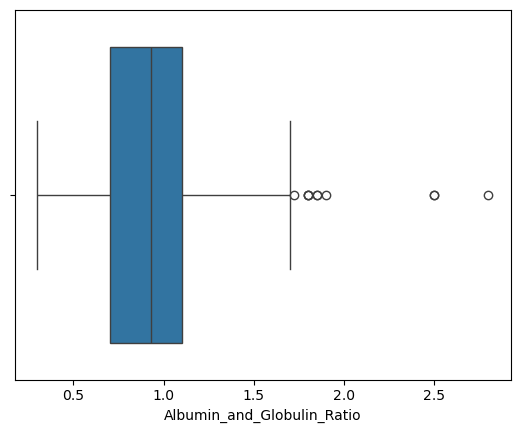

In [10]:
#checking for outlaires
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'])  
plt.show()

In [11]:
#filling null values with median

df["Albumin_and_Globulin_Ratio"] = df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].median())

In [12]:
#checking the null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
#droping the dupilicates
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

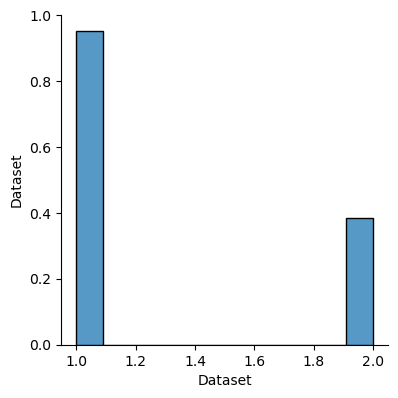

In [16]:
#Univariate analysis (Data imbalanc)
sns.pairplot(df[["Dataset"]],height=4)
plt.show()

In [18]:
df1 = df.drop(columns=["Gender"])

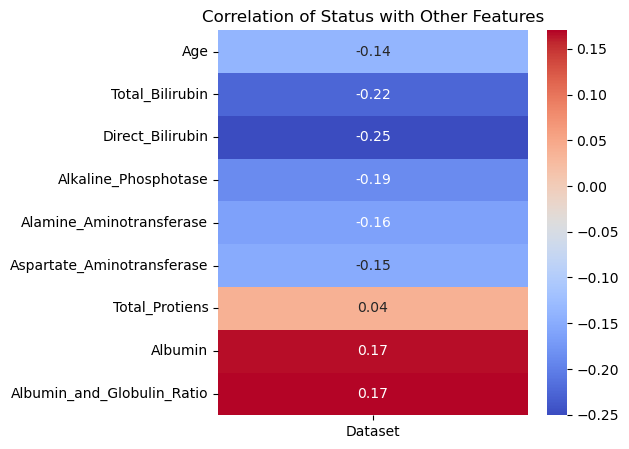

In [19]:
# Compute correlation of "Dataset" with all other columns
correlation_matrix = df1.corr()[["Dataset"]].drop(index="Dataset")

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Status with Other Features")
plt.show()

In [ ]:
#Corelated to liver_patient (Dataset)
# Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase (High corelated)
#Total_Protiens (Low corelated)

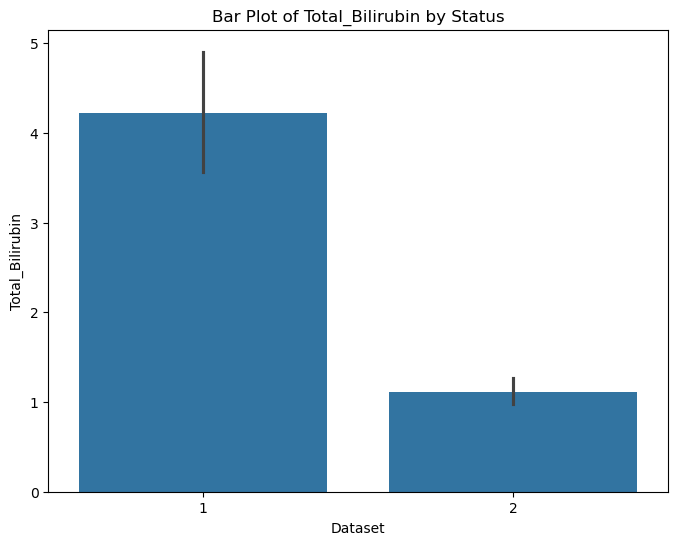

In [20]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="Dataset", y="Total_Bilirubin", data=df)  
plt.title("Bar Plot of Total_Bilirubin by Status")
plt.show()

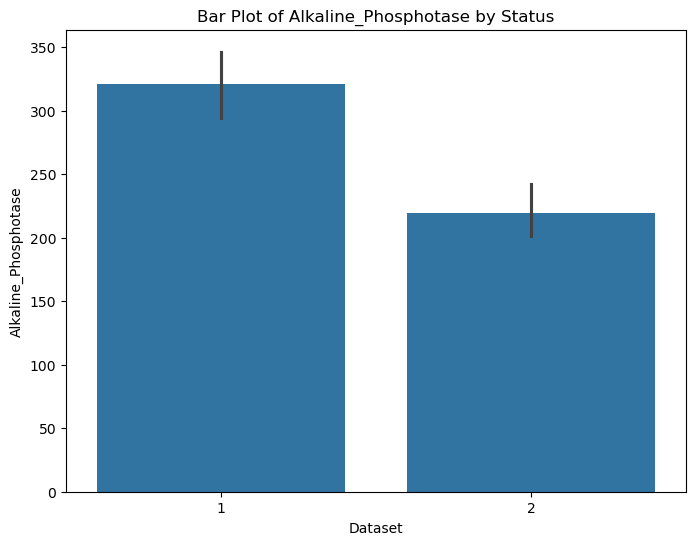

In [21]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="Dataset", y="Alkaline_Phosphotase", data=df)  
plt.title("Bar Plot of Alkaline_Phosphotase by Status")
plt.show()

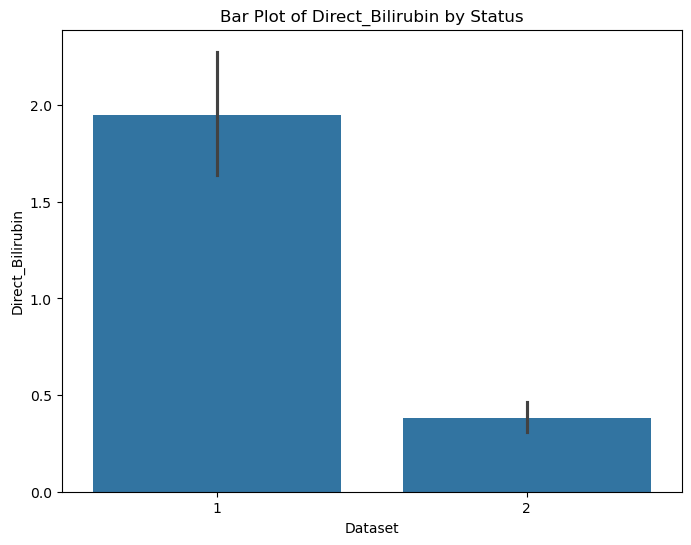

In [22]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="Dataset", y="Direct_Bilirubin", data=df)  
plt.title("Bar Plot of Direct_Bilirubin by Status")
plt.show()

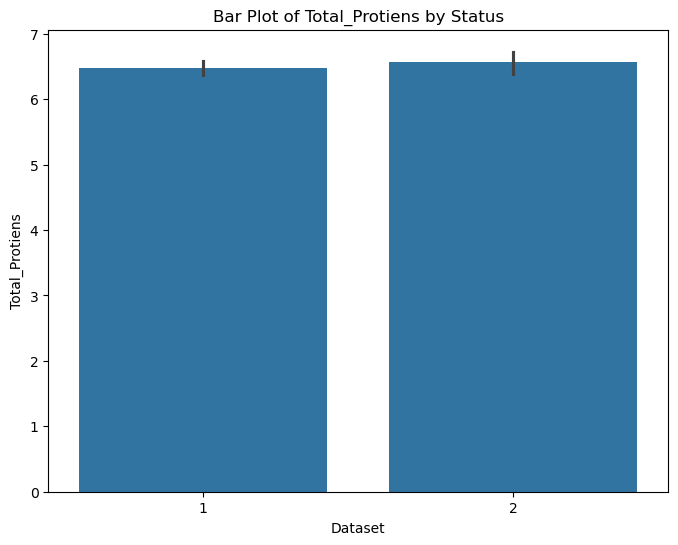

In [31]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="Dataset", y="Total_Protiens", data=df)  
plt.title("Bar Plot of Total_Protiens by Status")
plt.show()

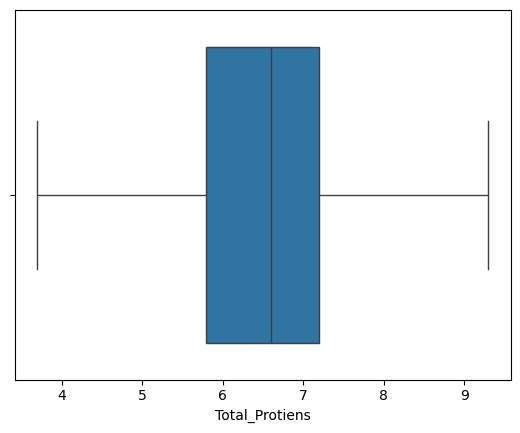

In [34]:
#Outlaires checking
sns.boxplot(x=df["Total_Protiens"])
plt.show()

In [33]:
#caping the Outliers (Treated)
Q1 = df["Total_Protiens"].quantile(0.25)
Q3 = df["Total_Protiens"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Total_Protiens"] = np.where(df["Total_Protiens"] < lower_bound, lower_bound, df["Total_Protiens"])
df["Total_Protiens"] = np.where(df["Total_Protiens"] > upper_bound, upper_bound, df["Total_Protiens"])

In [37]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Encode categorical feature (Gender: Male=1, Female=0)
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Display processed data
print(df.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7              0.10                 187.0   
1   62       1              5.3              2.95                 481.0   
2   62       1              5.3              2.95                 481.0   
3   58       1              1.0              0.40                 182.0   
4   72       1              3.9              2.00                 195.0   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    int32  
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    float64
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 51.2 KB


In [112]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and target
X = df.drop(columns=['Dataset'])  
y = df['Dataset']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE with a slightly higher sampling strategy
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Adjust sampling ratio as needed
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
unique, counts = np.unique(y_smote, return_counts=True)
print("After SMOTE:", dict(zip(unique, counts)))

# Compute the required number of samples to get exactly 582 total
total_samples_needed = 571
current_samples = len(y_smote)

# If oversampled dataset exceeds 582, apply undersampling
if current_samples > total_samples_needed:
    target_counts = {cls: int((count / current_samples) * total_samples_needed) for cls, count in zip(unique, counts)}
    undersample = RandomUnderSampler(sampling_strategy=target_counts, random_state=42)
    X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)
else:
    X_resampled, y_resampled = X_smote, y_smote  # Keep data as is

# Check final class distribution
unique_final, counts_final = np.unique(y_resampled, return_counts=True)
print("Final class distribution:", dict(zip(unique_final, counts_final)))
print("Total samples after resampling:", len(y_resampled))  # Should be exactly 571

After SMOTE: {1: 325, 2: 260}
Final class distribution: {1: 317, 2: 253}
Total samples after resampling: 570


In [113]:
y = y_resampled

In [114]:
type(y)

pandas.core.series.Series

In [125]:
y = pd.DataFrame(y_resampled, columns=['Dataset'])

In [131]:
y = y.squeeze()

In [117]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Identify numerical features
features_scale = ["Total_Bilirubin", "Direct_Bilirubin",
    "Alkaline_Phosphotase",  "Total_Protiens"]

In [118]:
# Initialize scaler
scaler = MinMaxScaler()

In [119]:
# Scale numerical features
df_scaled = df.copy()
df_scaled[features_scale] = scaler.fit_transform(df[features_scale])

In [120]:
#featurs 
X_scaled = df_scaled[features_scale]

In [121]:
print(X_scaled.head())

   Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Total_Protiens
0         0.061224          0.000000              0.296651        0.553571
1         1.000000          1.000000              1.000000        0.678571
2         1.000000          1.000000              1.000000        0.589286
3         0.122449          0.105263              0.284689        0.553571
4         0.714286          0.666667              0.315789        0.642857


In [122]:
#features 
X = X_scaled

In [123]:
type(X_scaled)

pandas.core.frame.DataFrame

In [126]:
type(y)

pandas.core.frame.DataFrame

In [127]:
# Ensure y has the same length as X

print(f"X shape: {X.shape}, y shape: {y.shape}")  # Debugging

if len(X) != len(y):
    y = y.iloc[:len(X)]  

X shape: (570, 4), y shape: (570, 1)


In [128]:
# Split into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
Lr = LogisticRegression(max_iter=500,random_state=42)

In [103]:
logreg = Lr.fit(x_train, np.squeeze(y_train))

In [104]:
y_pred = logreg.predict(x_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.631578947368421
Confusion Matrix:
 [[60  7]
 [35 12]]
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.90      0.74        67
           2       0.63      0.26      0.36        47

    accuracy                           0.63       114
   macro avg       0.63      0.58      0.55       114
weighted avg       0.63      0.63      0.59       114



In [106]:
Lr = LogisticRegression(max_iter=500,random_state=42, class_weight='balanced')
logreg = Lr.fit(x_train, np.squeeze(y_train))

In [107]:
y_pred = logreg.predict(x_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5701754385964912
Confusion Matrix:
 [[33 34]
 [15 32]]
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.49      0.57        67
           2       0.48      0.68      0.57        47

    accuracy                           0.57       114
   macro avg       0.59      0.59      0.57       114
weighted avg       0.60      0.57      0.57       114



In [182]:
rf_model = RandomForestClassifier(
    n_estimators = 100,  # Number of trees in the forest
    max_depth=  5,  # Maximum depth of each tree
    min_samples_split=  20,  # Minimum samples required to split a node
    min_samples_leaf=  15 # Minimum samples at a leaf node
)
rf_model.fit(x_train, np.squeeze(y_train))

# Predictions
y_pred = rf_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6140350877192983
Confusion Matrix:
 [[51 16]
 [28 19]]
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.76      0.70        67
           2       0.54      0.40      0.46        47

    accuracy                           0.61       114
   macro avg       0.59      0.58      0.58       114
weighted avg       0.60      0.61      0.60       114



In [183]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 500],  
    'max_depth': [5, 7, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, np.squeeze(y_train))

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.5483038700430004


In [171]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=5, random_state=42)
gb_model.fit(x_train, np.squeeze(y_train))

# Predictions
y_pred_gb = gb_model.predict(x_test)

# Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", class_report_gb)

Gradient Boosting Accuracy: 0.5614035087719298
Confusion Matrix:
 [[41 26]
 [24 23]]
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.61      0.62        67
           2       0.47      0.49      0.48        47

    accuracy                           0.56       114
   macro avg       0.55      0.55      0.55       114
weighted avg       0.56      0.56      0.56       114



In [ ]:
# Model deploye